## Project 2 Location
Jacob Minkin
Last project I tried to predict a critical violation from location and cuisine. The problem is that almost all restaurants have at least one critical violation which made it hard to get any predictive value from the model. Now I want to try again with predicting the score and therefore grade of the restaurant

In [277]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from sklearn.impute import KNNImputer
sns.set_style('darkgrid')

#Import Data
df = pd.read_csv('../data/Inspection.csv')
df['date'] = pd.to_datetime(df['INSPECTION DATE'])
df = df[df.BORO == 'Manhattan']
df.sort_values(['date'], ascending=False, inplace= True)
df = df.groupby(['CAMIS'], sort=False).first()

In [278]:

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10824 entries, 50114345 to 50107551
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   DBA                     10261 non-null  object        
 1   BORO                    10824 non-null  object        
 2   BUILDING                10809 non-null  object        
 3   STREET                  10824 non-null  object        
 4   ZIPCODE                 10612 non-null  float64       
 5   PHONE                   10822 non-null  object        
 6   CUISINE                 9083 non-null   object        
 7   INSPECTION DATE         10824 non-null  object        
 8   ACTION                  9083 non-null   object        
 9   VIOLATION CODE          9060 non-null   object        
 10  VIOLATION               9060 non-null   object        
 11  CRITICAL FLAG           10824 non-null  object        
 12  SCORE                   9082 non-nul

In [279]:
Location_Factors = ['SCORE','BUILDING', 'STREET', 'ZIPCODE', 'PHONE',
                     'Latitude', 'Longitude', 'Community Board', 
                       'Council District', 'BIN', 'BBL', 'NTA']
df.loc[:, ~df.columns.isin(Location_Factors)].info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10824 entries, 50114345 to 50107551
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   DBA                     10261 non-null  object        
 1   BORO                    10824 non-null  object        
 2   CUISINE                 9083 non-null   object        
 3   INSPECTION DATE         10824 non-null  object        
 4   ACTION                  9083 non-null   object        
 5   VIOLATION CODE          9060 non-null   object        
 6   VIOLATION               9060 non-null   object        
 7   CRITICAL FLAG           10824 non-null  object        
 8   GRADE                   9083 non-null   object        
 9   GRADE DATE              8455 non-null   object        
 10  RECORD DATE             10824 non-null  object        
 11  INSPECTION TYPE         9083 non-null   object        
 12  Census Tract            10569 non-nu

In [280]:
Location_df = df[Location_Factors]

Location_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10824 entries, 50114345 to 50107551
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SCORE             9082 non-null   float64
 1   BUILDING          10809 non-null  object 
 2   STREET            10824 non-null  object 
 3   ZIPCODE           10612 non-null  float64
 4   PHONE             10822 non-null  object 
 5   Latitude          10796 non-null  float64
 6   Longitude         10796 non-null  float64
 7   Community Board   10569 non-null  float64
 8   Council District  10569 non-null  float64
 9   BIN               10486 non-null  float64
 10  BBL               10781 non-null  float64
 11  NTA               10569 non-null  object 
dtypes: float64(8), object(4)
memory usage: 1.1+ MB


In [281]:
Location_df.STREET.value_counts().head(25)

BROADWAY                  666
2 AVENUE                  394
1 AVENUE                  331
3 AVENUE                  319
AMSTERDAM AVENUE          307
LEXINGTON AVENUE          297
9 AVENUE                  266
8 AVENUE                  238
7 AVENUE                  170
MADISON AVENUE            144
5 AVENUE                  134
COLUMBUS AVENUE           124
6 AVENUE                  118
10 AVENUE                 115
AVENUE OF THE AMERICAS     98
WEST   42 STREET           95
PARK AVENUE                88
HUDSON STREET              85
WEST   46 STREET           78
GREENWICH STREET           78
WEST   32 STREET           72
PENN PLZ                   71
MOTT STREET                71
EAST   14 STREET           71
BLEECKER STREET            67
Name: STREET, dtype: int64

In [282]:
Location_df.groupby('STREET')['SCORE'].agg(['count', 'mean', 'std']).sort_values(by='count', ascending=False).head(20)



count       mean        std
STREET                                             
BROADWAY                  568  13.193662  11.215910
2 AVENUE                  330  13.406061  10.468884
3 AVENUE                  278  13.032374  11.035667
1 AVENUE                  269  14.650558  10.684616
AMSTERDAM AVENUE          268  15.041045  14.458587
LEXINGTON AVENUE          252  13.011905  10.092592
9 AVENUE                  221  14.461538  14.274727
8 AVENUE                  204  11.553922   7.569841
7 AVENUE                  139  11.928058   8.736597
MADISON AVENUE            128  13.375000   9.821237
5 AVENUE                  109  12.091743  11.508886
COLUMBUS AVENUE           107  14.485981  12.149512
6 AVENUE                   97  11.989691  10.378759
10 AVENUE                  92  13.902174   9.086955
AVENUE OF THE AMERICAS     77  10.129870   9.190027
PARK AVENUE                75  11.306667   8.821003
HUDSON STREET              72  11.902778   9.730393
WEST   42 STREET           72  10.430556  12.067680
PENN PLZ                   68   3.485294   7.238975
WEST   32 STREET           66  12.621212  13.173125

In [283]:
Location_df.BUILDING.value_counts().head(25)

1      102
4       94
30      72
42      72
20      70
200     65
75      64
2       64
11      64
100     63
10      61
225     50
135     49
15      47
150     46
115     43
45      43
25      43
55      43
120     41
5       41
50      40
88      40
230     40
110     40
Name: BUILDING, dtype: int64

In [284]:
Location_df.groupby('BUILDING')['SCORE'].agg(['count', 'mean', 'std']).sort_values(by='count', ascending=False).head(20)

count       mean        std
BUILDING                             
4            90   4.333333   5.832879
1            74  10.067568   7.988572
30           58  15.172414  13.436188
2            58  13.810345  12.480802
200          54  11.018519  12.582544
11           53  11.113208   7.967869
75           51  15.607843  19.709976
20           48  12.833333   9.496547
42           48   9.208333   8.230608
10           47  12.212766  11.456792
100          45  15.377778  11.637105
135          42  11.000000  10.464807
225          41  15.365854  13.215060
25           39  12.128205   8.941857
15           39  15.692308  14.529741
55           39  11.512821   6.463956
5            38  13.815789  10.857443
45           38  14.789474  11.964266
150          38  11.868421  10.897982
111          36   9.916667   9.116312

In [285]:
#Location_df['A'] = Location_df['BUILDING'].astype(float)
Location_df['BUILDING']  = pd.to_numeric(Location_df['BUILDING'], errors='coerce').fillna(0)
Location_df['BUILDING']



C:\Users\logic_switch\AppData\Local\Temp\ipykernel_34112\3159528522.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Location_df['BUILDING']  = pd.to_numeric(Location_df['BUILDING'], errors='coerce').fillna(0)


CAMIS
50114345     126.0
50067994    1601.0
50036864     559.0
50057298     151.0
50085148    1140.0
             ...  
50130678     124.0
50124010      71.0
50129856      10.0
50129286     664.0
50107551      73.0
Name: BUILDING, Length: 10824, dtype: float64

In [286]:
location_regression = Location_df[['SCORE', 'STREET', 'BUILDING']]
location_regression

SCORE                  STREET  BUILDING
CAMIS                                            
50114345    3.0        LEXINGTON AVENUE     126.0
50067994   34.0   SAINT NICHOLAS AVENUE    1601.0
50036864   11.0            LENOX AVENUE     559.0
50057298   30.0        EAST   77 STREET     151.0
50085148   41.0                1 AVENUE    1140.0
...         ...                     ...       ...
50130678    NaN        EAST   14 STREET     124.0
50124010    NaN           NASSAU STREET      71.0
50129856    NaN        WEST   50 STREET      10.0
50129286    NaN  AVENUE OF THE AMERICAS     664.0
50107551    NaN        GREENWICH AVENUE      73.0

[10824 rows x 3 columns]

In [287]:
Clist = location_regression.STREET.value_counts().head(25).index
location_regression.loc[~location_regression['STREET'].isin(Clist), 'STREET'] = 'OTHER'
location_regression.STREET.value_counts()

OTHER                     6327
BROADWAY                   666
2 AVENUE                   394
1 AVENUE                   331
3 AVENUE                   319
AMSTERDAM AVENUE           307
LEXINGTON AVENUE           297
9 AVENUE                   266
8 AVENUE                   238
7 AVENUE                   170
MADISON AVENUE             144
5 AVENUE                   134
COLUMBUS AVENUE            124
6 AVENUE                   118
10 AVENUE                  115
AVENUE OF THE AMERICAS      98
WEST   42 STREET            95
PARK AVENUE                 88
HUDSON STREET               85
GREENWICH STREET            78
WEST   46 STREET            78
WEST   32 STREET            72
MOTT STREET                 71
EAST   14 STREET            71
PENN PLZ                    71
BLEECKER STREET             67
Name: STREET, dtype: int64

In [288]:
location_regression = pd.get_dummies(location_regression, columns=['STREET'])

location_regression_mutated = location_regression.iloc[:, 1:].multiply(location_regression['BUILDING'], axis=0)

location_regression_mutated.drop('BUILDING', axis=1, inplace=True)
#location_regression_mutated
#location_regression_mutated = location_regression.iloc[:, 1:].multiply(df['BUILDING'], axis=0)

Street_regression = pd.merge(location_regression.SCORE, location_regression_mutated, on='CAMIS')

In [289]:
Street_regression

SCORE  STREET_1 AVENUE  STREET_10 AVENUE  STREET_2 AVENUE  \
CAMIS                                                                 
50114345    3.0              0.0               0.0              0.0   
50067994   34.0              0.0               0.0              0.0   
50036864   11.0              0.0               0.0              0.0   
50057298   30.0              0.0               0.0              0.0   
50085148   41.0           1140.0               0.0              0.0   
...         ...              ...               ...              ...   
50130678    NaN              0.0               0.0              0.0   
50124010    NaN              0.0               0.0              0.0   
50129856    NaN              0.0               0.0              0.0   
50129286    NaN              0.0               0.0              0.0   
50107551    NaN              0.0               0.0              0.0   

          STREET_3 AVENUE  STREET_5 AVENUE  STREET_6 AVENUE  STREET_7 AVENUE  \
CAMIS                                                                          
50114345              0.0              0.0              0.0              0.0   
50067994              0.0              0.0              0.0              0.0   
50036864              0.0              0.0              0.0              0.0   
50057298              0.0              0.0              0.0              0.0   
50085148              0.0              0.0              0.0              0.0   
...                   ...              ...              ...              ...   
50130678              0.0              0.0              0.0              0.0   
50124010              0.0              0.0              0.0              0.0   
50129856              0.0              0.0              0.0              0.0   
50129286              0.0              0.0              0.0              0.0   
50107551              0.0              0.0              0.0              0.0   

          STREET_8 AVENUE  STREET_9 AVENUE  ...  STREET_HUDSON STREET  \
CAMIS                                       ...                         
50114345              0.0              0.0  ...                   0.0   
50067994              0.0              0.0  ...                   0.0   
50036864              0.0              0.0  ...                   0.0   
50057298              0.0              0.0  ...                   0.0   
50085148              0.0              0.0  ...                   0.0   
...                   ...              ...  ...                   ...   
50130678              0.0              0.0  ...                   0.0   
50124010              0.0              0.0  ...                   0.0   
50129856              0.0              0.0  ...                   0.0   
50129286              0.0              0.0  ...                   0.0   
50107551              0.0              0.0  ...                   0.0   

          STREET_LEXINGTON AVENUE  STREET_MADISON AVENUE  STREET_MOTT STREET  \
CAMIS                                                                          
50114345                    126.0                    0.0                 0.0   
50067994                      0.0                    0.0                 0.0   
50036864                      0.0                    0.0                 0.0   
50057298                      0.0                    0.0                 0.0   
50085148                      0.0                    0.0                 0.0   
...                           ...                    ...                 ...   
50130678                      0.0                    0.0                 0.0   
50124010                      0.0                    0.0                 0.0   
50129856                      0.0                    0.0                 0.0   
50129286                      0.0                    0.0                 0.0   
50107551                      0.0                    0.0                 0.0   

          STREET_OTHER  STREET_PARK AVENUE  STREET_PEN

In [290]:

df_test = Street_regression
df_test = df_test[(df_test.SCORE.notnull()) ]

df_test2 = location_regression
df_test2 = df_test[(df_test.SCORE.notnull()) ]

Simple_X = df_test.iloc[:, 1:]
Simple_y = df_test.SCORE

Simple_X2 = df_test.iloc[:, 1:]
Simple_y2 = df_test.SCORE
#Simple_X

In [291]:
from sklearn.linear_model import LinearRegression

CUISINE_linear_model = LinearRegression().fit(X = Simple_X, y= Simple_y)

CUISINE_score = CUISINE_linear_model.score(Simple_X, Simple_y)
print(f'CUISINE score: {CUISINE_score}')

CUISINE_linear_model = LinearRegression().fit(X = Simple_X2, y= Simple_y)

CUISINE_score = CUISINE_linear_model.score(Simple_X2, Simple_y)
print(f'CUISINE score: {CUISINE_score}')

CUISINE score: 0.009816478917660021
CUISINE score: 0.009816478917660021


## LOCATION K MEANS

In [292]:
Location_df

SCORE  BUILDING                  STREET  ZIPCODE       PHONE  \
CAMIS                                                                    
50114345    3.0     126.0        LEXINGTON AVENUE  10016.0  6463705380   
50067994   34.0    1601.0   SAINT NICHOLAS AVENUE  10040.0  6468690092   
50036864   11.0     559.0            LENOX AVENUE  10037.0  3476849436   
50057298   30.0     151.0        EAST   77 STREET  10075.0  6469227025   
50085148   41.0    1140.0                1 AVENUE  10065.0  2128385080   
...         ...       ...                     ...      ...         ...   
50130678    NaN     124.0        EAST   14 STREET  10003.0  7186078306   
50124010    NaN      71.0           NASSAU STREET  10038.0  7183163446   
50129856    NaN      10.0        WEST   50 STREET  10020.0  7188138424   
50129286    NaN     664.0  AVENUE OF THE AMERICAS  10010.0  2123822226   
50107551    NaN      73.0        GREENWICH AVENUE  10014.0  6465945909   

           Latitude  Longitude  Community Board  Council District        BIN  \
CAMIS                                                                          
50114345  40.742881 -73.982292            105.0               2.0  1018209.0   
50067994  40.855003 -73.929582            112.0              10.0  1064035.0   
50036864  40.816310 -73.939258            110.0               9.0  1060031.0   
50057298  40.773421 -73.959328            108.0               4.0  1043195.0   
50085148  40.761808 -73.960339            108.0               5.0  1045319.0   
...             ...        ...              ...               ...        ...   
50130678  40.733804 -73.988435            103.0               2.0  1084306.0   
50124010  40.709632 -74.008325            101.0               1.0  1001215.0   
50129856  40.758709 -73.977645            105.0               4.0  1075692.0   
50129286  40.741383 -73.993890            105.0               3.0  1015517.0   
50107551  40.736643 -74.001158            102.0               3.0  1010989.0   

                   BBL   NTA  
CAMIS                         
50114345  1.008840e+09  MN20  
50067994  1.021690e+09  MN35  
50036864  1.020078e+09  MN03  
50057298  1.014120e+09  MN40  
50085148  1.014570e+09  MN31  
...                ...   ...  
50130678  1.005590e+09  MN22  
50124010  1.000798e+09  MN25  
50129856  1.012650e+09  MN17  
50129286  1.008220e+09  MN13  
50107551  1.006140e+09  MN23  

[10824 rows x 12 columns]

In [300]:
from sklearn.cluster import KMeans

# create a sample dataframe
long_lat_df = Location_df[['Latitude', 'Longitude', 'SCORE']]
long_lat_df = long_lat_df.loc[(df.Longitude != 0) & (df.Latitude != 0)].dropna()

# create k-means object with 2 clusters
kmeans_5 = KMeans(n_clusters=14)

# fit k-means object to the data
kmeans_5.fit(long_lat_df)


# get the cluster labels
labels = kmeans_5.predict(long_lat_df)

# add the labels to your original dataframe
long_lat_df['cluster'] = labels

In [298]:
long_lat_df

Latitude  Longitude  SCORE  cluster
CAMIS                                         
50114345  40.742881 -73.982292    3.0        0
50067994  40.855003 -73.929582   34.0        1
50036864  40.816310 -73.939258   11.0        2
50057298  40.773421 -73.959328   30.0        3
50085148  40.761808 -73.960339   41.0        1
...             ...        ...    ...      ...
41226031  40.767425 -73.990523   12.0        2
40560953  40.758757 -73.987446   10.0        2
40944945  40.758823 -73.993607   10.0        2
50046091  40.867386 -73.916780   11.0        2
50043445  40.842565 -73.942097    8.0        2

[8893 rows x 4 columns]

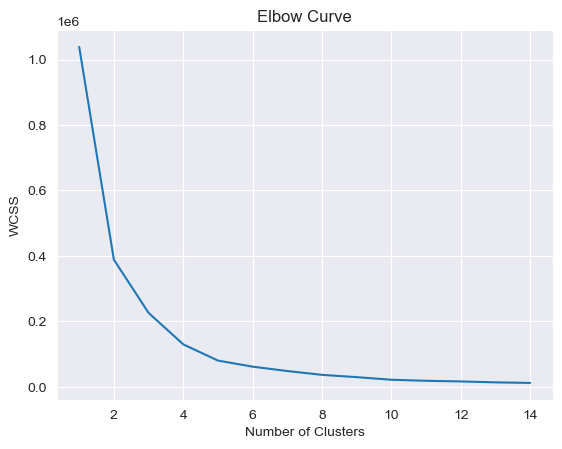

In [299]:
# create a list to hold WCSS values for different k values
wcss = []

# create a range of k values to test
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(long_lat_df)
    wcss.append(kmeans.inertia_)

# plot the elbow curve
plt.plot(range(1, 15), wcss)
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

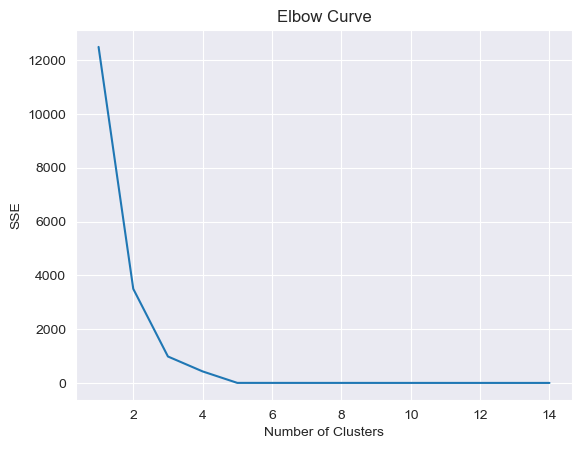

In [296]:
# create a list to hold WCSS values for different k values
sse = []
# create a range of k values to test
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(long_lat_df)
    sse.append(kmeans.inertia_)

# plot the elbow curve
plt.plot(range(1, 15), wcss)
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()

In [246]:
fp = "../data/base_map/geo_export_68048701-5e7b-45e0-ac1c-85b45c057d6d.shp"
map_data = gpd.read_file(fp)


In [301]:
gdf = gpd.GeoDataFrame(
    long_lat_df, geometry=gpd.points_from_xy(long_lat_df.Longitude, long_lat_df.Latitude))  

Text(0.5, 1.0, 'New York City Restaurants')

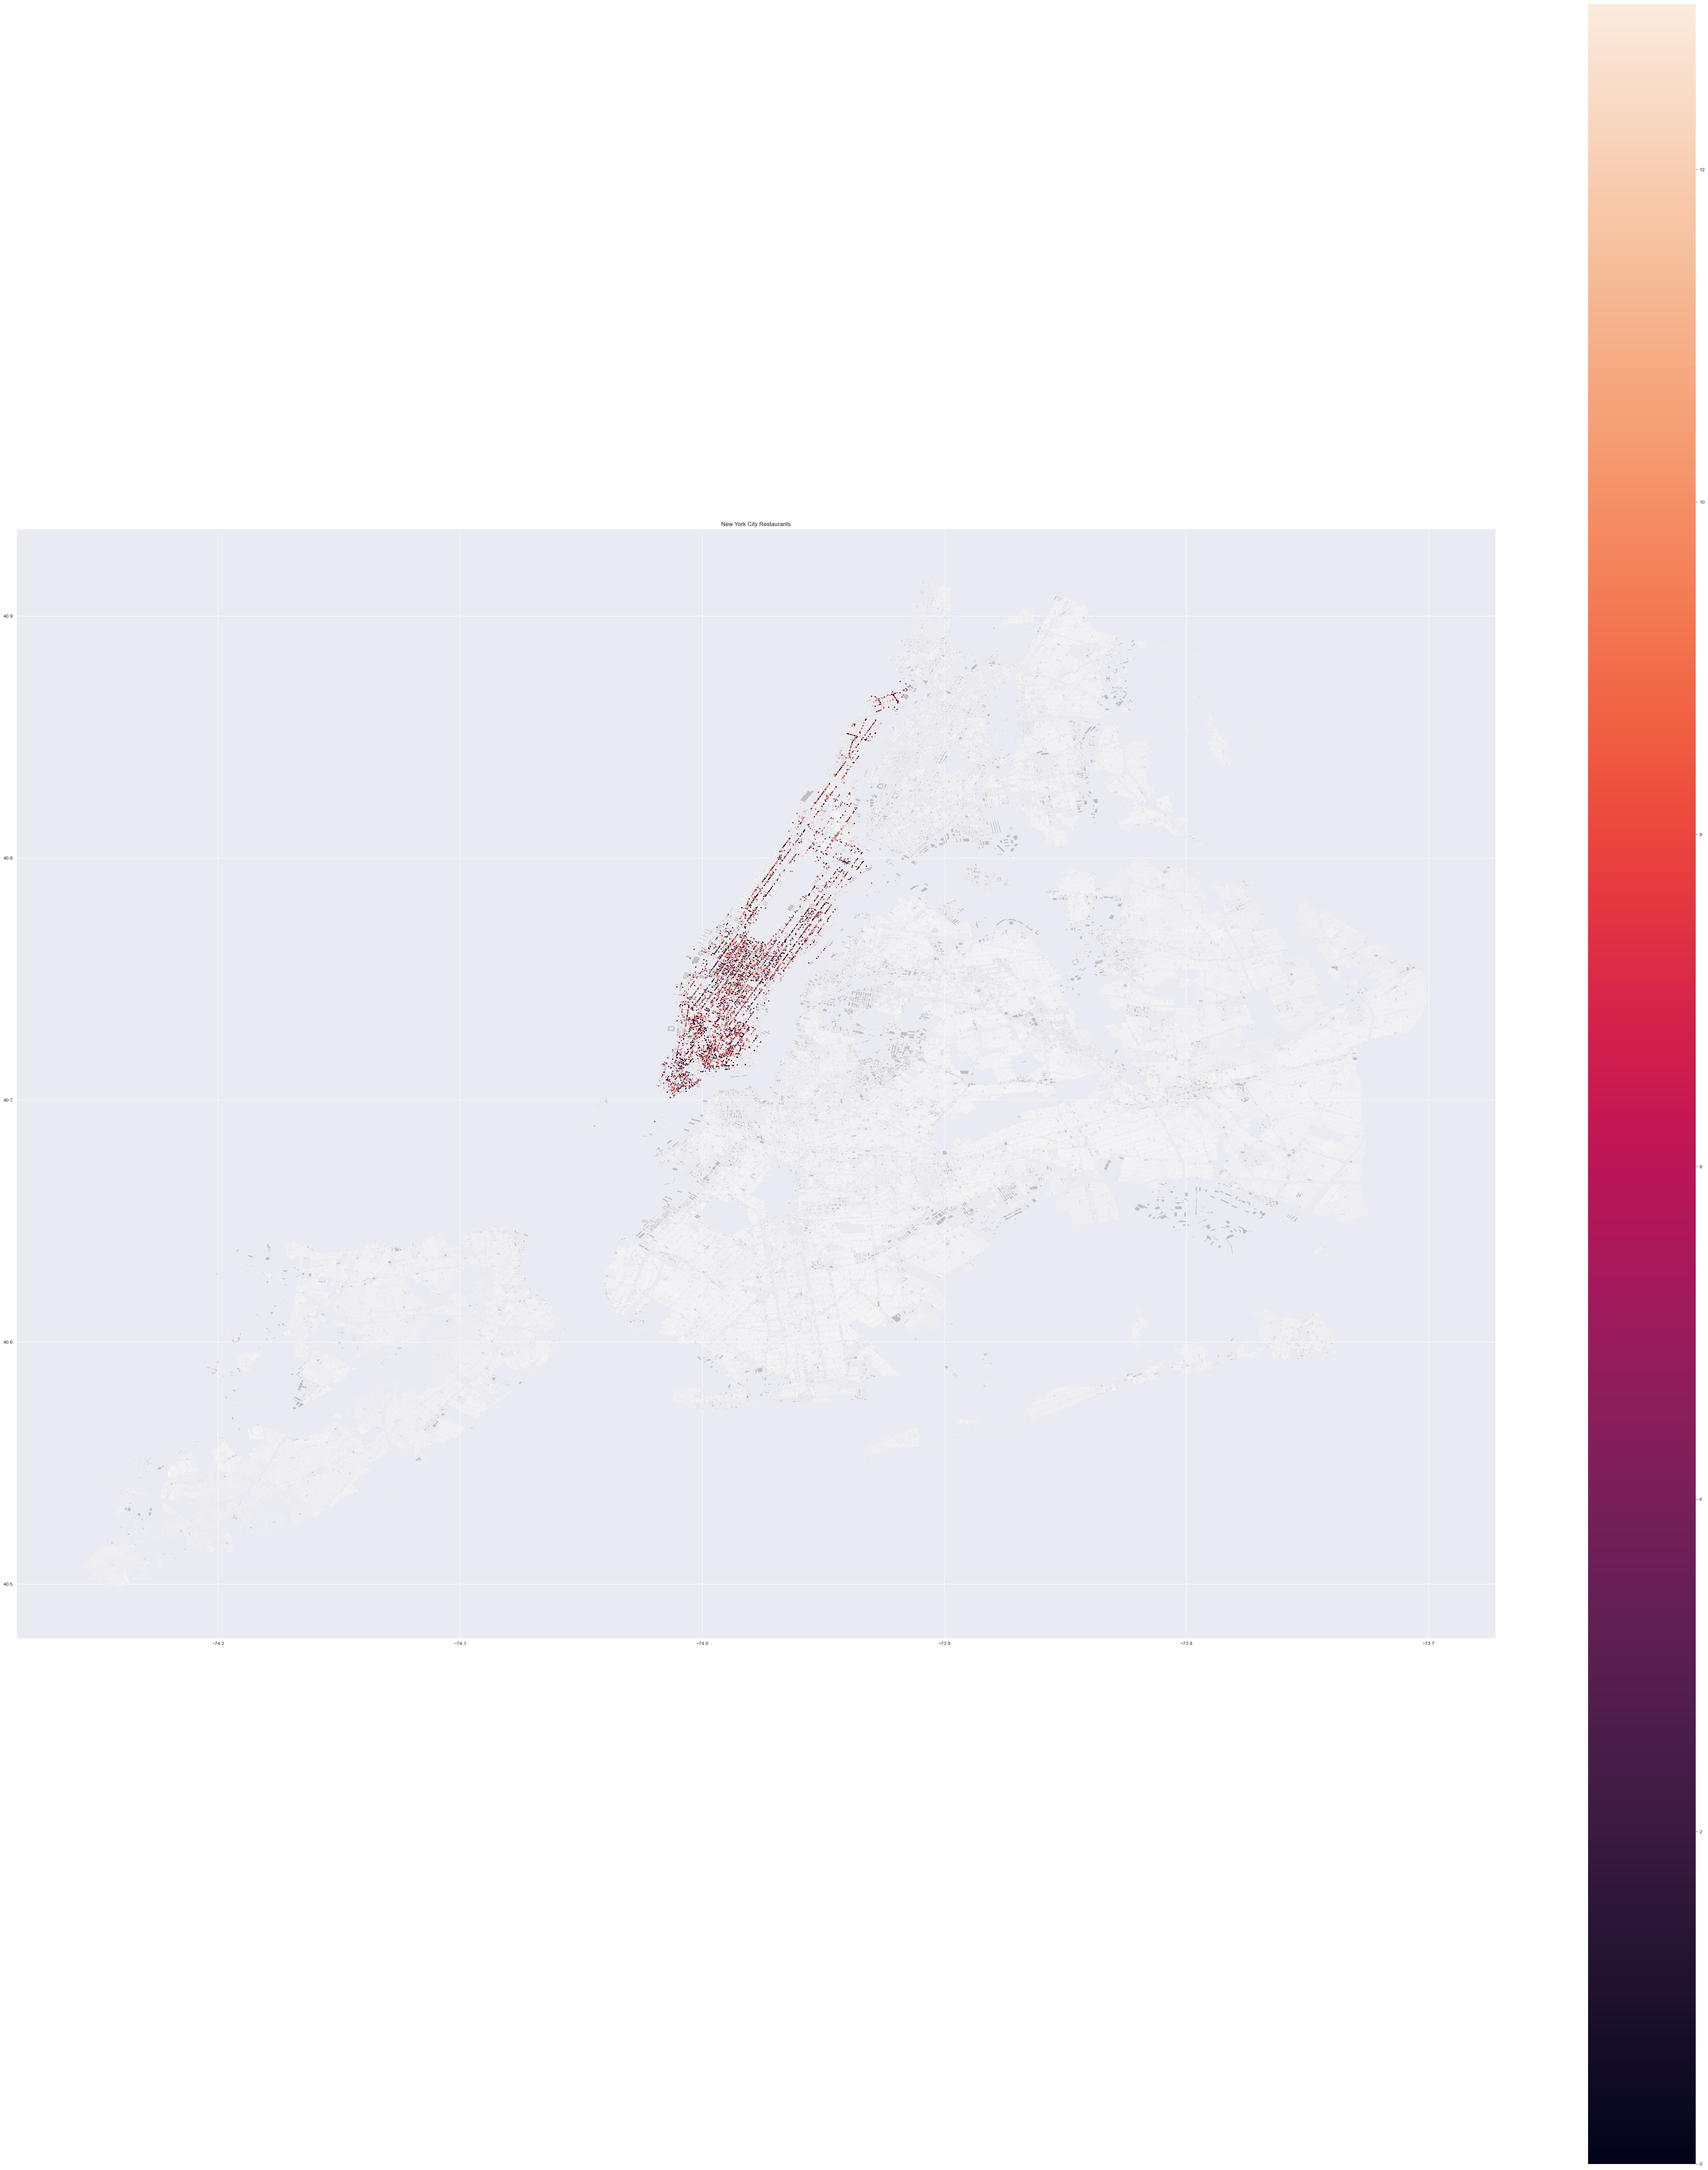

In [302]:
fig, ax = plt.subplots(figsize=(68, 80))

map_data.plot(ax=ax, color="grey", alpha=0.4)

gdf.plot('cluster', ax=ax, markersize=2, marker="o", legend= True)

plt.title("New York City Restaurants")


In [303]:
cluster_regression = pd.merge(df[['SCORE', 'CUISINE']], long_lat_df['cluster'], on= "CAMIS")

In [272]:
cluster_regression

SCORE     CUISINE  cluster
CAMIS                               
50114345    3.0   Pakistani        1
50067994   34.0     Spanish        0
50036864   11.0     Spanish        4
50057298   30.0  Coffee/Tea        3
50085148   41.0       Pizza        3
...         ...         ...      ...
50130678    NaN        None        2
50124010    NaN        None        2
50129856    NaN        None        1
50129286    NaN        None        1
50107551    NaN        None        2

[10584 rows x 3 columns]

In [304]:
df_test = cluster_regression
df_test = df_test[(df_test.SCORE.notnull()) ]
Just_CUISINE = pd.get_dummies(df_test.CUISINE)
Simple_X = Just_CUISINE
Simple_y = df_test.SCORE

In [305]:
from sklearn.linear_model import LinearRegression

CUISINE_linear_model = LinearRegression().fit(X = Simple_X, y= Simple_y)

CUISINE_score = CUISINE_linear_model.score(Simple_X, Simple_y)
print(f'CUISINE score: {CUISINE_score}')


CUISINE score: 0.03621275656461287


## Backward Selection

In [315]:
L_selection = Location_df.dropna()

In [316]:
L_selection.isna().sum()

SCORE               0
BUILDING            0
STREET              0
ZIPCODE             0
PHONE               0
Latitude            0
Longitude           0
Community Board     0
Council District    0
BIN                 0
BBL                 0
NTA                 0
dtype: int64

In [322]:
x = L_selection.iloc[:, 1:]
y = L_selection['SCORE']

In [323]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import load_boston

boston = load_boston()

estimator = AdaBoostRegressor(random_state=0, n_estimators=100)
selector = RFE(estimator, n_features_to_select=8, step=1)
selector = selector.fit(x, y)

c:\Users\logic_switch\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing da

ValueError: could not convert string to float: 'LEXINGTON AVENUE'

In [321]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

model = LinearRegression()
rfe = RFE(model, 3)
rfe = rfe.fit(X_train, y_train)

print(rfe.support_)
print(rfe.ranking_)

TypeError: __init__() takes 2 positional arguments but 3 were given